In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\91904\Desktop\Projects\stack-overflow-data.csv')

In [3]:
data.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [4]:
data.shape

(40000, 2)

In [5]:
data['tags'].unique()

array(['c#', 'asp.net', 'objective-c', '.net', 'python', 'angularjs',
       'iphone', 'ruby-on-rails', 'ios', 'c', 'sql', 'java', 'jquery',
       'css', 'c++', 'php', 'android', 'mysql', 'javascript', 'html'],
      dtype=object)

In [6]:
data['tags'].nunique()

20

Checking for null values.

In [7]:
pd.isnull(data['tags']).sum()

0

No null values are present.

In [8]:
data['post'].apply(lambda x: len(x.split(' '))).sum()

10286120

We have more than 10 million words in the data.

Distribution of classes.

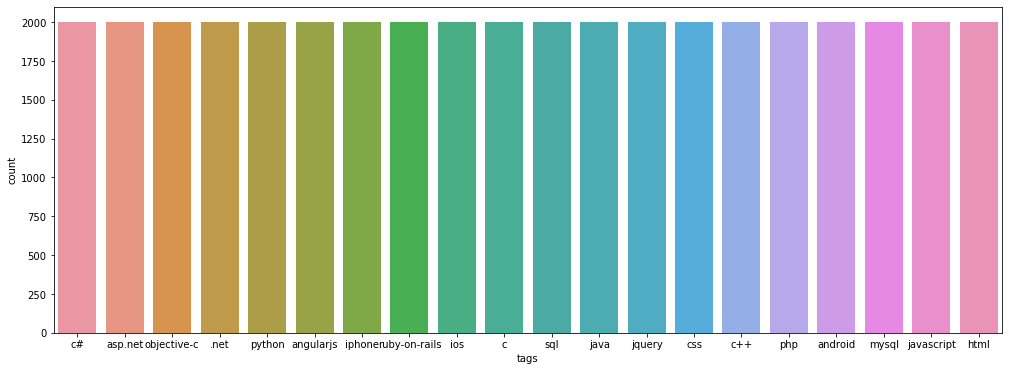

In [9]:
plt.figure(figsize=(17,6))
sns.countplot(data['tags'])

From the above visualisation we can see classes are very well balanced.

In [10]:
def post_tag(index):
    post = data[data.index==index].values[0]
    print(post[0])
    print('Tag:', post[1])

Looking few posts and tags.

In [11]:
post_tag(5)

how to give alias name for my website  i have deployed my asp.net site in one of our server which is in ip format. so  i used to browse it like… <code>http://xx.xx.xx.xx/mysite</code>    but  i want to get out of this ip and give some text. how can i achieve this.    also  i can’t change the host alias name.
Tag: asp.net


In [12]:
post_tag(11)

how to install .ipa on jailbroken iphone over the air with out apple certificate  how can i install ipa/deb files on an iphone device directly without user interference i.e. user should not use any terminal or third party tool like cyberduck/iexplorer to install the file  the entire process should be automated. exactly the same as cydia does.
Tag: ios


In [13]:
post_tag(10000)

     i like to create this type of validation every row or tr so please help me..]<a href= http://i.stack.imgur.com/t8zyd.png  rel= nofollow >1</a>]<a href= http://i.stack.imgur.com/t8zyd.png  rel= nofollow >1</a>    i put this one but if i write in one text field every validation gone..
Tag: javascript


The texts needs to be cleaned up.

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [15]:
def clean_text(text):
    text = BeautifulSoup(text,'lxml').text
    text = text.lower()
    text = re.sub('[/(){}\[\]\|@,;]', " ",text)
    text = re.sub('[^0-9a-z #+_]'," ",text)
    text = ' '.join(word for word in text.split() if word not in set(stopwords.words('english')))
    return text

In [16]:
data['post'] = data['post'].apply(clean_text)

In [17]:
post_tag(5)

give alias name website deployed asp net site one server ip format used browse like http xx xx xx xx mysite want get ip give text achieve also change host alias name
Tag: asp.net


In [18]:
post_tag(11)

install ipa jailbroken iphone air apple certificate install ipa deb files iphone device directly without user interference e user use terminal third party tool like cyberduck iexplorer install file entire process automated exactly cydia
Tag: ios


In [19]:
post_tag(10000)

use java script validation using clone function separate validation row java script used clone add function validation every row help var 0 function clonerow var row document getelementbyid clone var table document getelementbyid data var selectindex 1 var clone row clonenode true table appendchild clone clone setattribute style function deleterow btn var result confirm want delete result var row btn parentnode parentnode row parentnode removechild row div class row div class col sm 12 div class col sm 7 div div class col sm 2 button type button class btn btn primary default btn xs onclick clonerow add button div div div br br div class row id close div class col sm 4 div div class col sm 4 form id name_value method post table class table striped tbody id data tr id clone style display none td name input type text name input_name style width 100px id name name input_name td td value input type text name input_value style width 100px id value name input_value td td button type button cl

Much better.

In [20]:
data['post'].apply(lambda x: len(x.split(" "))).sum()

3880052

Now, we have over 3 million words to work with.

Splitting the dataset.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data['post']
y = data['tags']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
X_train.shape

(32000,)

In [25]:
X_test.shape

(8000,)

In [26]:
X_test.head()

12836    converting string breaks arraylist following s...
10913    show progress httprequest angular created usin...
4214     obj c really safe compare bool variables used ...
8198     setting coordinates facing problem setting bac...
31403    heap corruption using make_shared class privat...
Name: post, dtype: object

The next steps includes feature engineering and model building using pipeline.

## Naive Bayes classifier for multinomial models.

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
y_pred = nb.predict(X_test)

In [31]:
print(confusion_matrix(y_pred,y_test))

[[248   4   3  32   9  39  15   0   3   3   9  14   6   0   4   4   6   4
    1   1]
 [  3 374   0   1   0   0   1   0   2   2   5   5   0   0   0   1   0   0
    1   0]
 [  0   0 408   3   2   1   0   0   6   0   3   2  12  12   0   1   3   0
    2   0]
 [ 42   2   2 298   0  29   0   2  14   1   5   7   8   6   3   4   6   1
    1   5]
 [  2   0   0   0 366  12  42   0   2   2   2  10   5   0   1  11   4   6
    1   0]
 [ 44   2   0  12   2 202   4   0   0   1   0   4   4   1   0   4   5   3
    0   1]
 [  7   0   1   0  23  17 317   0   0   0   0   7   3   0   0   7   3   0
    0   1]
 [  1   6   1  10   1   4   2 357  79  10   3   0  10  37   1   2   8   4
    1   0]
 [  1   2   5  10   2   5   0  32 225   3   6   5  34  16   2   3  29   3
    5   0]
 [  0  16   1   0   0   0   0   0   0 270  93   1   1   0   0  62   0   1
    0   0]
 [  0   3   0   0   0   1   0   0   0  52 224   1   1   0   0  37   0   0
    1   0]
 [  9   9   0   0   5  37  11   0   2   0   0 298   4   0   2   4

In [32]:
print(classification_report(y_pred, y_test,target_names=data['tags'].unique()))
print(accuracy_score(y_pred,y_test))

               precision    recall  f1-score   support

           c#       0.66      0.61      0.63       405
      asp.net       0.86      0.95      0.90       395
  objective-c       0.94      0.90      0.92       455
         .net       0.77      0.68      0.72       436
       python       0.87      0.79      0.83       466
    angularjs       0.52      0.70      0.60       289
       iphone       0.77      0.82      0.80       386
ruby-on-rails       0.89      0.66      0.76       537
          ios       0.60      0.58      0.59       388
            c       0.68      0.61      0.64       445
          sql       0.54      0.70      0.61       320
         java       0.79      0.77      0.78       389
       jquery       0.59      0.75      0.66       306
          css       0.76      0.72      0.74       427
          c++       0.78      0.64      0.71       505
          php       0.62      0.70      0.66       351
      android       0.74      0.81      0.77       362
        m

# Linear support vector machine.

In [33]:
from sklearn.linear_model import SGDClassifier

In [34]:
svm = Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('svm_clf', SGDClassifier(loss='hinge', penalty='l2',alpha=0.001,n_jobs=-1,random_state=0,max_iter=5))])
svm.fit(X_train,y_train)             

C:\Users\91904\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('svm_clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                  

In [35]:
%%time
y_pred_svm = svm.predict(X_test)
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm, target_names=data['tags'].unique()))

0.7955
               precision    recall  f1-score   support

           c#       0.80      0.66      0.72       377
      asp.net       0.86      0.93      0.89       437
  objective-c       0.92      0.98      0.95       433
         .net       0.79      0.83      0.81       387
       python       0.77      0.89      0.83       421
    angularjs       0.78      0.45      0.57       387
       iphone       0.84      0.71      0.77       411
ruby-on-rails       0.67      0.95      0.79       401
          ios       0.83      0.54      0.65       378
            c       0.77      0.58      0.67       397
          sql       0.71      0.68      0.70       412
         java       0.77      0.87      0.82       377
       jquery       0.79      0.77      0.78       391
          css       0.83      0.83      0.83       402
          c++       0.87      0.80      0.83       414
          php       0.70      0.71      0.70       400
      android       0.80      0.89      0.85       398
  

# Logistic regression.

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = Pipeline([('vect',CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('lr_clf', LogisticRegression(n_jobs=-1,C=0.01))])

In [38]:
lr.fit(X_train,y_train)

C:\Users\91904\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\91904\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\91904\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('lr_clf',
                 LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [39]:
y_pred_lr = lr.predict(X_test)

In [40]:
print(accuracy_score(y_pred_lr,y_test))
print(classification_report(y_pred_lr,y_test,target_names= data['tags'].unique()))

0.747625
               precision    recall  f1-score   support

           c#       0.64      0.66      0.65       366
      asp.net       0.79      0.98      0.87       353
  objective-c       0.92      0.98      0.95       408
         .net       0.76      0.76      0.76       386
       python       0.87      0.72      0.79       507
    angularjs       0.37      0.63      0.47       229
       iphone       0.65      0.89      0.75       301
ruby-on-rails       0.96      0.61      0.75       623
          ios       0.55      0.68      0.61       308
            c       0.65      0.62      0.64       415
          sql       0.59      0.75      0.66       326
         java       0.85      0.60      0.70       535
       jquery       0.72      0.76      0.74       368
          css       0.73      0.78      0.75       379
          c++       0.80      0.74      0.77       446
          php       0.64      0.65      0.64       394
      android       0.78      0.87      0.82       358


# Random Forest.

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('rfc', RandomForestClassifier(n_estimators=200, criterion='entropy'))])
rfc.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=

In [43]:
y_pred_rfc = rfc.predict(X_test)

In [44]:
print(accuracy_score(y_pred_rfc,y_test))
print(classification_report(y_pred_rfc,y_test))

0.79975
               precision    recall  f1-score   support

         .net       0.69      0.65      0.67       401
      android       0.89      0.97      0.93       399
    angularjs       0.97      0.98      0.97       428
      asp.net       0.77      0.80      0.78       373
            c       0.88      0.79      0.83       472
           c#       0.56      0.68      0.62       321
          c++       0.70      0.88      0.78       328
          css       0.93      0.69      0.79       538
         html       0.67      0.72      0.69       349
          ios       0.62      0.75      0.68       325
       iphone       0.74      0.62      0.67       490
         java       0.83      0.86      0.85       365
   javascript       0.79      0.82      0.80       377
       jquery       0.86      0.85      0.85       405
        mysql       0.79      0.84      0.81       386
  objective-c       0.69      0.73      0.71       379
          php       0.82      0.88      0.85       373
 

# Creating bag of words with Keras.

In [45]:
from tensorflow import keras

In [46]:
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [47]:
train_size = int(len(data) * 0.7)

In [48]:
print('Train size: %d' %train_size)
print('Test_size: %d' %(len(data)-train_size))

Train size: 28000
Test_size: 12000


In [49]:
train_post = data['post'][:train_size]
train_tag = data['tags'][:train_size]
test_post = data['post'][train_size:]
test_tag = data['tags'][train_size:]

In [50]:
train_post.head()

0    causing behavior c# datetime type test public ...
1    dynamic html load iframe asp net 4 0 site user...
2    convert float value min sec trying convert sec...
3    net framework 4 redistributable wondering get ...
4    trying calculate print mean returning rather n...
Name: post, dtype: object

In [51]:
train_tag.head()

0             c#
1        asp.net
2    objective-c
3           .net
4         python
Name: tags, dtype: object

In [52]:
test_post.head()

28000    live streaming using iphone saving video techn...
28001    allow jpg png files possible duplicate allow c...
28002    asp net max number aspx pages app know asp net...
28003    load firing trying execute jquery code #imgunr...
28004    uploaded file located saved jquery file upload...
Name: post, dtype: object

In [53]:
test_tag.head()

28000        iphone
28001           php
28002       asp.net
28003        jquery
28004    javascript
Name: tags, dtype: object

In [54]:
token = text.Tokenizer(num_words=1000,char_level=False)

In [55]:
token.fit_on_texts(train_post)

In [56]:
x_train = token.texts_to_matrix(train_post)
x_test = token.texts_to_matrix(test_post)

In [57]:
print(x_train)
print(x_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(28000, 1000)


In [58]:
print(x_test)
print(x_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(12000, 1000)


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder = LabelEncoder()

In [61]:
Y_train = encoder.fit_transform(train_tag)
Y_test = encoder.transform(test_tag)

In [62]:
print(Y_train)
print(Y_train.shape)

[ 5  3 15 ... 16  1  2]
(28000,)


In [63]:
print(Y_test)
print(Y_test.shape)

[10 16  3 ...  4  2  1]
(12000,)


In [64]:
num_classes = np.max(Y_train) + 1

In [65]:
Y_train = utils.to_categorical(Y_train, num_classes)

In [66]:
Y_test = utils.to_categorical(Y_test, num_classes)

In [67]:
print(Y_test)
print(Y_test.shape)
print(Y_train)
print(Y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(12000, 20)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(28000, 20)


Building model.

In [68]:
model = Sequential()
model.add(Dense(512, input_shape=(1000,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
%%time
model.fit(x_train,Y_train, batch_size=32, epochs=2)

Epoch 1/2
28000/28000 [==============================] - 15s 546us/step - loss: 0.2898 - accuracy: 0.9013
Epoch 2/2
28000/28000 [==============================] - 15s 536us/step - loss: 0.2507 - accuracy: 0.9137s - loss: 0.2509 - accuracy: 0.91
Wall time: 30.3 s


In [72]:
score = model.evaluate(x_test, Y_test,
                       batch_size=32, verbose=1)
print('Test accuracy:', score[1])

12000/12000 [==============================] - 2s 130us/step
Test accuracy: 0.7917500138282776
